In [114]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
n=100
info_e_stob={}
for filenum in [1,3,5,7]:
    with open("experimentResults/StobbeEdgeFileSec"+str(filenum)+".pkl", 'rb') as f:
        info_e_stob[filenum] = pickle.load(f)

for e in info_e_stob[1]:
    print (e)
print(info_e_stob[1][40])
#print(info_e_stob)    

20
25
30
35
40
45
50
55
60
65
70
[(0.0, 399.0, 1.826312255859375, 1.7956619262695312, [1.7550368309020996, 1.772953987121582, 2.282521963119507, 1.8664555549621582, 1.6981699466705322, 1.8753280639648438, 2.0702061653137207, 1.79402494430542, 1.8250060081481934, 1.7972989082336426, 1.7332355976104736, 2.025496006011963, 1.6242623329162598, 1.5918443202972412, 2.046271800994873, 1.6000185012817383, 2.00219988822937, 1.8899998664855957, 1.601071834564209, 1.6748425960540771]), (0.6, 532.0, 2.081314218044281, 2.065669536590576, [2.342716693878174, 2.328167676925659, 2.050675868988037, 2.0324904918670654, 2.2697479724884033, 1.9442873001098633, 1.8452589511871338, 2.0465521812438965, 1.792743444442749, 2.290351152420044, 1.9355268478393555, 2.1750428676605225, 2.1427783966064453, 1.7881979942321777, 2.1386709213256836, 2.0806632041931152, 2.536180019378662, 2.0070533752441406, 2.1569762229919434, 1.7222027778625488]), (0.9, 665.0, 2.720138359069824, 2.7047410011291504, [2.7855911254882812,

In [115]:
import pickle
info_e = {}
for filenum in [1,3,5,7]:
    with open("experimentResults/SWHTEdgeFileSec"+str(filenum)+".pkl", 'rb') as f:
        info_e[filenum] = pickle.load(f)
        
for e in info_e[1]:
    print (e)
print(info_e[1][20])

20
25
30
35
40
45
50
55
60
65
70
[(0.65, 2593.0, 0.2950264811515808, 1.1, 1.4, 0.2981683015823364, [0.26494598388671875, 0.3000624179840088, 0.27591538429260254, 0.3084721565246582, 0.29627418518066406, 0.2841939926147461, 0.2949845790863037, 0.26633381843566895, 0.3160581588745117, 0.32005929946899414, 0.32307887077331543, 0.30127525329589844, 0.31531524658203125, 0.24440288543701172, 0.32361674308776855, 0.27081727981567383, 0.29618215560913086, 0.3011002540588379, 0.3183465003967285, 0.2790944576263428]), (1.0, 3591.0, 0.3413726806640625, 1.1, 1.3, 0.33063387870788574, [0.3365459442138672, 0.3472573757171631, 0.35421252250671387, 0.3616607189178467, 0.37221574783325195, 0.40864038467407227, 0.31882500648498535, 0.31328797340393066, 0.410219669342041, 0.35056209564208984, 0.3309288024902344, 0.32694554328918457, 0.3303389549255371, 0.3253135681152344, 0.3191866874694824, 0.3352642059326172, 0.32270193099975586, 0.3120839595794678, 0.32665419578552246, 0.32460832595825195]), (0.9, 309

In [116]:
plot_x_stob = {}
plot_y_stob = {}
sample_stob = {}
error_stob = {}
for filenum in [1, 3, 5, 7]:
    plot_x_stob[filenum] = []
    plot_y_stob[filenum] = []
    sample_stob[filenum] = []
    error_stob[filenum] = [] 
    for e in info_e_stob[filenum]:
        plot_x_stob[filenum].append(e)
        for value in info_e_stob[filenum][e]:
            p, samp, meanT, medT, listT = value
            if p >= 0.9:
                plot_y_stob[filenum].append(meanT)
                sample_stob[filenum].append(samp)
                error_stob[filenum].append(np.std(listT)) 
                break
#print(plot_x_stob,plot_y_stob)


        

In [117]:
plot_x = {}
plot_y = {}
sample = {}
err= {}
for filenum in [1,3,5,7]:
    plot_x[filenum]=[]
    plot_y[filenum]=[]
    sample[filenum]=[]
    err[filenum] = [] 
    for e in info_e[filenum]:
        plot_x[filenum].append(e)
        min = 100
        for value in info_e[filenum][e]:
            p, samp, meanT,  C, ratio, medT, listT = value 
            if p >= 0.9 and meanT<min:
                min=meanT
                optSamp = samp
                optListT = listT
        err[filenum].append(np.std(optListT))
        sample[filenum].append(optSamp)
        plot_y[filenum].append(min)

print(len(err[1]))
print(len(plot_x[1]))

11
11


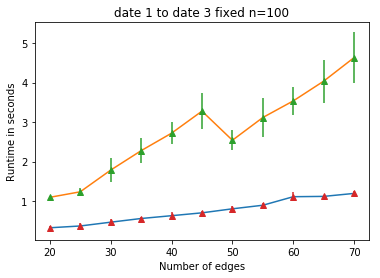

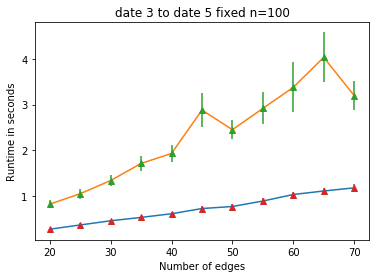

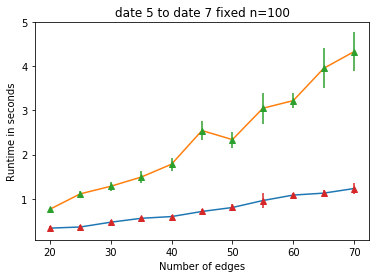

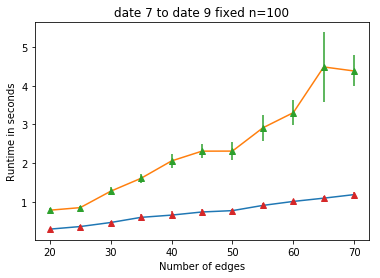

In [118]:
#num = 1
for filenum in [1,3,5,7]:
    #plt.subplot(2,2,num)
    plt.plot(plot_x[filenum], plot_y[filenum])
    plt.plot(plot_x_stob[filenum], plot_y_stob[filenum])
    plt.errorbar(plot_x_stob[filenum], plot_y_stob[filenum], error_stob[filenum], linestyle='None', marker='^')
    plt.errorbar(plot_x[filenum], plot_y[filenum], err[filenum], linestyle='None', marker='^')
    plt.xlabel('Number of edges')
    plt.ylabel('Runtime in seconds')
    plt.title("date "+ str(filenum)+" to date "+str(filenum+2) + " fixed n=100")
    plt.savefig('images/'+'E'+str(filenum)+'.png')
    plt.show()
    #num += 1


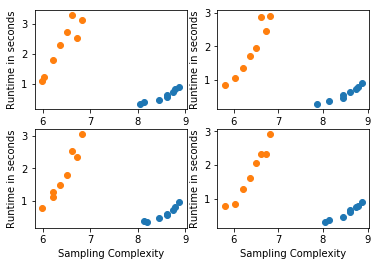

In [119]:
num = 1
for filenum in [1,3,5,7]:
    plt.subplot(2,2,num)
    plt.xlabel('Sampling Complexity')
    plt.ylabel('Runtime in seconds')
    plt.scatter(np.log(sample[filenum][0:8]), plot_y[filenum][0:8])
    plt.scatter(np.log(sample_stob[filenum][0:8]), plot_y_stob[filenum][0:8])
    num += 1

In [123]:
import pickle
import matplotlib.pyplot as plt
info_n_stob={}
for filenum in [1,3,5,7]:
    with open("experimentResults/StobbeVertexFileSec"+str(filenum)+".pkl", 'rb') as f:
        info_n_stob[filenum] = pickle.load(f)

for n in info_n_stob[1]:
    print(n)
print(info_n_stob[1][150])
#print(info_e_stob)  


50
70
90
110
130
150
170
190
210
[(0.0, 543.0, 3.5693176627159118, 3.591481566429138, [3.2273809909820557, 2.967597484588623, 2.988616466522217, 3.636863946914673, 3.6733198165893555, 3.4040303230285645, 3.5243263244628906, 3.389835834503174, 3.725545883178711, 3.1698763370513916, 3.3358168601989746, 3.686533212661743, 3.5460991859436035, 3.725780725479126, 4.073047637939453, 4.050646781921387, 3.164111375808716, 4.134442090988159, 4.108895778656006, 3.853586196899414]), (0.7, 724.0, 4.626565766334534, 4.634323239326477, [4.541301488876343, 4.343028545379639, 4.852646350860596, 5.102294206619263, 4.252583980560303, 4.132302284240723, 4.086101055145264, 4.026000022888184, 4.209964990615845, 4.315799236297607, 5.048731803894043, 4.932311058044434, 4.727344989776611, 4.168609142303467, 5.481831789016724, 4.841838359832764, 5.17924952507019, 4.440387487411499, 4.776500225067139, 5.072488784790039]), (0.95, 905.0, 5.3826197504997255, 5.346696853637695, [5.066601514816284, 5.16379189491272, 

In [124]:
plot_x_stob = {}
plot_x_stob = {}
sample_stob = {}
error_stob={}
for filenum in [1,3,5,7]:
    plot_x_stob[filenum]=[]
    plot_y_stob[filenum]=[]
    sample_stob[filenum] = []
    error_stob[filenum] = []
    for n in info_n_stob[filenum]:
        plot_x_stob[filenum].append(n)
        for value in info_n_stob[filenum][n]:
            p, samp, meanT, medT, listT = value
            if p >= 0.9:
                plot_y_stob[filenum].append(meanT)
                sample_stob[filenum].append(samp)
                error_stob[filenum].append(np.std(listT))
                break


In [125]:
info_n={}
for filenum in [1,3,5,7]:
    with open("experimentResults/SWHTVertexFileSec"+str(filenum)+".pkl", 'rb') as f:
        info_n[filenum] = pickle.load(f)

for n in info_n[1]:
    print(n)
print(info_n[1][800])
#print(info_e_stob)    

50
70
90
110
130
150
170
190
210
230
250
300
400
500
600
700
800
[(0.8, 8831.0, 3.6731842398643493, 1.1, 1.4, 3.516097664833069, [4.552509784698486, 3.7144806385040283, 3.4410343170166016, 3.4123311042785645, 4.04988431930542, 3.476571798324585, 4.095726251602173, 3.216111183166504, 3.3886239528656006, 3.960198163986206, 3.213848352432251, 3.5556235313415527, 4.774035692214966, 3.4125804901123047, 3.7537286281585693, 3.1923418045043945, 3.1858625411987305, 3.9774043560028076, 3.3260743618011475, 3.7647135257720947]), (1.0, 12499.0, 4.284556531906128, 1.1, 1.3, 4.187892317771912, [4.130110740661621, 4.071117401123047, 4.234805107116699, 4.125710487365723, 4.498846054077148, 4.561328887939453, 4.852001905441284, 4.805407524108887, 4.388693809509277, 4.50909423828125, 4.2043163776397705, 4.334287166595459, 4.171468257904053, 4.118619441986084, 3.9794039726257324, 4.372861862182617, 4.0989830493927, 4.146890163421631, 4.06800389289856, 4.0191802978515625]), (1.0, 9646.0, 3.60973219871521, 

In [126]:
plot_x = {}
plot_y = {}
sample = {}
err = {}
for filenum in [1, 3, 5,7]:
    plot_x[filenum]=[]
    plot_y[filenum]=[]
    sample[filenum]=[]
    err[filenum] = []
    for n in info_n[filenum]:
        plot_x[filenum].append(n)
        min = 100
        for value in info_n[filenum][n]:
            p, samp, meanT,  C, ratio, medT, listT = value 
            if p >= 0.9 and meanT < min:
                min = meanT
                optSamp = samp
                optListT = listT       
        sample[filenum].append(optSamp)
        plot_y[filenum].append(min)
        err[filenum].append(np.std(optListT))



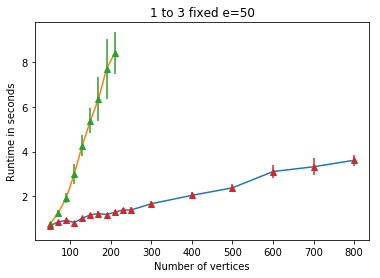

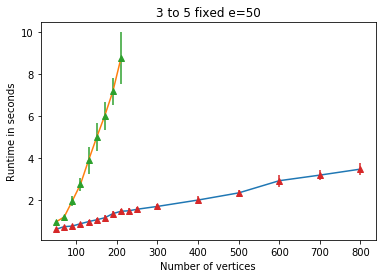

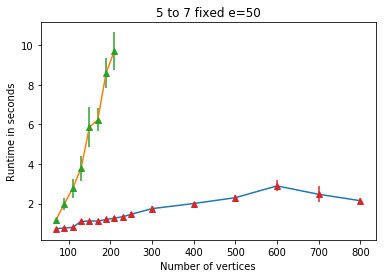

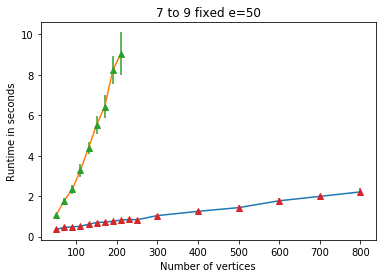

In [128]:
#num = 1
for filenum in [1, 3,5,7]:
    #plt.subplot(2,2,num)
    plt.plot(plot_x[filenum], plot_y[filenum])
    plt.plot(plot_x_stob[filenum], plot_y_stob[filenum])
    plt.errorbar(plot_x_stob[filenum], plot_y_stob[filenum], error_stob[filenum], linestyle='None', marker='^')
    plt.errorbar(plot_x[filenum], plot_y[filenum], err[filenum], linestyle='None', marker='^')
    plt.xlabel('Number of vertices')
    plt.ylabel('Runtime in seconds')
    plt.title(str(filenum)+" to "+str(filenum+2) + " fixed e=50")
    plt.savefig('images/'+'V'+str(filenum)+'.png')
    plt.show()
    #num += 1

In [111]:
#For table
for filenum in [7]:
    print(plot_x[filenum])
    print(plot_x_stob[filenum])
    print(sample[filenum])
    print(sample_stob[filenum])
    print(plot_y[filenum])
    print(plot_y_stob[filenum])

[50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 300, 400, 500, 600, 700, 800]
[50, 70, 90, 110, 130, 150, 170, 190, 210]
[5711.0, 7010.0, 6491.0, 6491.0, 6913.25, 7942.0, 7942.0, 7271.0, 7942.0, 7942.0, 7271.0, 8794.0, 8051.0, 8051.0, 8831.0, 8831.0, 8831.0]
[707.0, 767.0, 812.0, 850.0, 880.0, 905.0, 927.0, 947.0, 965.0]
[0.3531455874443054, 0.4548304080963135, 0.4777273297309875, 0.5124820232391357, 0.6057579159736634, 0.6940486311912537, 0.7138002514839172, 0.7587860941886901, 0.8176836609840393, 0.844564151763916, 0.836234176158905, 1.0382795810699463, 1.2481209754943847, 1.4313186764717103, 1.7707733750343322, 1.9862529754638671, 2.2086212635040283]
[1.0429792642593383, 1.774183416366577, 2.3376268267631533, 3.2696367621421816, 4.38189195394516, 5.524166667461396, 6.4293543815612795, 8.227412700653076, 9.042179524898529]


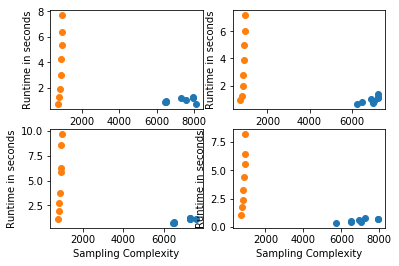

In [112]:
num = 1
for filenum in [1,3,5,7]:
    plt.subplot(2,2,num)
    plt.xlabel('Sampling Complexity')
    plt.ylabel('Runtime in seconds')
    plt.scatter(sample[filenum][0:8], plot_y[filenum][0:8])
    plt.scatter(sample_stob[filenum][0:8], plot_y_stob[filenum][0:8])
    num += 1

In [113]:
import matplotlib.pyplot as plt

# Sparsity, sampling complexity/runtime -- Fixed n=30
e = []
cplx = []
runTime = []
for key in info_e:
    e.append(key)
    for value in info_e[key]:
        if value[0]>0.9:
            cplx.append(value[1])
            runTime.append(value[2])
            break

e_our = []
cplx_our = []
runTime_our = []
for key in info_e_our:
    e_our.append(key)
    for value in info_e_our[key]:
        if value[0]>0.5:
            cplx_our.append(value[1]/15)
            runTime_our.append(value[2])
            break
            
print("\ne=", e, "\n sampling complexity =", cplx, "\nruntime=", runTime)

plt.subplot(2,1,1)
plt.plot(e, cplx, "ro")
plt.plot(e_our, cplx_our, "bo")

plt.xlabel('No of edges i.e. Sparsity')
plt.ylabel('Sampling complexity')
plt.title('Sampling complexity/Sparsity for Succes rate of 0.95 and n=30')
plt.show()
plt.subplot(2,1,2)
plt.plot(e, runTime, "ro")
plt.plot(e_our, runTime_our, "bo")

plt.xlabel('No of edges i.e. Sparsity')
plt.ylabel('Runtime in seconds')
plt.title('Running time /Sparsity for Succes rate of 0.95 and n= 30 ')
plt.show()

TypeError: 'int' object is not subscriptable


v= [20, 22, 25, 27, 30, 35, 40, 45, 50, 55, 60, 70, 80, 100] 
 sampling complexity = [6960, 5400, 5580, 5760, 5940, 6180, 6420, 6600, 6780, 6960, 7140, 7380, 7620, 7980] 
runtime= [0.06803139448165893, 0.05639523267745972, 0.0678758978843689, 0.07533912658691407, 0.09266746044158936, 0.11859598159790039, 0.13781228065490722, 0.1549919366836548, 0.20539551973342896, 0.21029651165008545, 0.24063161611557007, 0.33378121852874754, 0.4066352486610413, 0.5842599987983703]


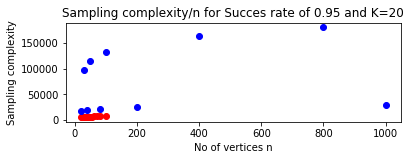

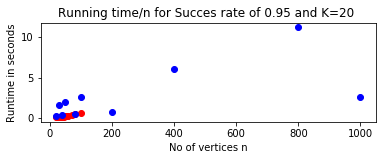

In [64]:

# n, samplingComplexity/runtime -- Fixed sparsity=20
v = []
cplx = []
runTime = []
for key in info_n:
    v.append(key)
    for value in info_n[key]:
        if value[0]>0.9:
            cplx.append(value[1])
            runTime.append(value[2])
            break

v_our = []
cplx_our = []
runTime_our = []
for key in info_n_our:
    v_our.append(key)
    for value in info_n_our[key]:
        if value[0]>0.9:
            cplx_our.append(value[1]/15)
            runTime_our.append(value[2])
            break
print("\nv=", v, "\n sampling complexity =", cplx, "\nruntime=", runTime)

plt.subplot(2,1,1)
plt.plot(v, cplx, "ro")
plt.plot(v_our, cplx_our, "bo")
plt.xlabel('No of vertices n')
plt.ylabel('Sampling complexity')
plt.title('Sampling complexity/n for Succes rate of 0.95 and K=20')
plt.show()
plt.subplot(2,1,2)
plt.plot(v, runTime, "ro")
plt.plot(v_our, runTime_our, "bo")
plt.xlabel('No of vertices n')
plt.ylabel('Runtime in seconds')
plt.title('Running time/n for Succes rate of 0.95 and K=20 ')
plt.show()